In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

Load Dataset

In [9]:
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=[iris["feature_names"]])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Scale Data

In [12]:
for col in df.columns:
    avg = df[col].mean()
    sd = df[col].std()
    df[col] = df[col].apply(lambda x: (x-avg)/sd)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


Implement K-Means

In [17]:
km = KMeans(n_clusters = 3)
df["cluster"] = km.fit_predict(df)

df.head()

c:\Users\sruja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,-0.897674,1.015602,-1.335752,-1.311052,1
1,-1.139200,-0.131539,-1.335752,-1.311052,1
2,-1.380727,0.327318,-1.392399,-1.311052,1
3,-1.501490,0.097889,-1.279104,-1.311052,1
4,-1.018437,1.245030,-1.335752,-1.311052,1


In [18]:
df.cluster.value_counts()

(cluster,)
2             53
1             50
0             47
Name: count, dtype: int64

Implement K-Means using Elbow Method

In [19]:
# In the previous method, we assumed n=3, but the actual approach is to find n and then implement K-Means. As done below.

dist_df = []
for num_clusters in range(1,11):
    km = KMeans(n_clusters = num_clusters)
    km.fit(df)
    dist_df.append([num_clusters, km.inertia_])
dist_df = pd.DataFrame(dist_df, columns=["number_of_clusters", "distance"])

dist_df

c:\Users\sruja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sruja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sruja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sruja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

,number_of_clusters,distance
0,1,695.760000
1,2,320.519294
2,3,138.888360
3,4,113.331624
4,5,95.471562
5,6,82.264296
6,7,72.211836
7,8,63.289704
8,9,56.352375
9,10,50.649464


Text(0.5, 1.0, 'K-Means Elbow Method')

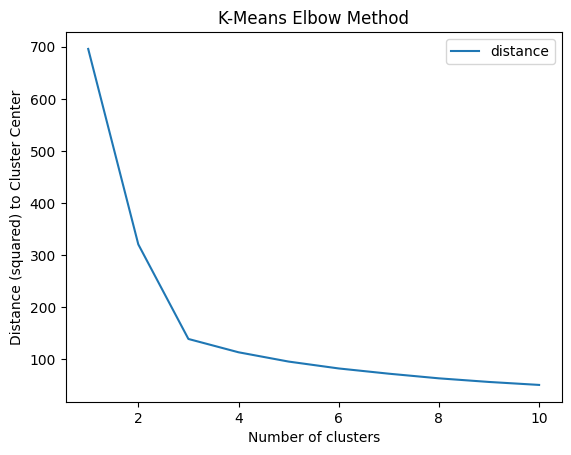

In [22]:
dist_df.set_index("number_of_clusters").plot()
plt.xlabel("Number of clusters")
plt.ylabel("Distance (squared) to Cluster Center")
plt.title("K-Means Elbow Method")

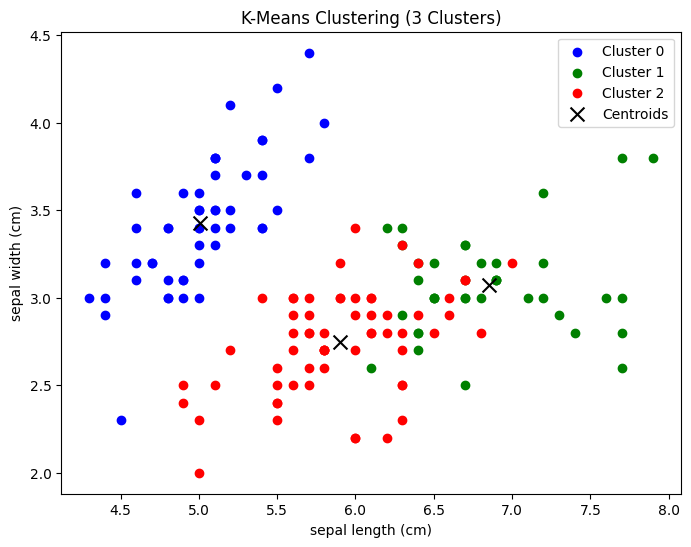

In [32]:
# Create a scatter plot to visualize the K-Means clustering results
plt.figure(figsize=(8, 6))

# Define colors for the clusters
colors = ['blue', 'green', 'red']

# Loop through each cluster and plot its points with a unique color
for cluster_id in range(3):
    cluster_data = df[df["cluster"] == cluster_id]
    plt.scatter(cluster_data[iris.feature_names[0]], cluster_data[iris.feature_names[1]], label=f'Cluster {cluster_id}', c=colors[cluster_id])

# Plot the cluster centers as 'X' markers
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='black', marker='x', s=100, label='Centroids')

# Add labels and a title to the plot
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering (3 Clusters)')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()
